In [25]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator,TransformerMixin
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
dataset = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv") 

In [3]:
dataset.head() 

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
dataset = dataset.drop(["Person ID"], axis=1) 

In [5]:
dataset["Sleep Disorder"].unique() 

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [7]:
dataset.isna().any() 

Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder             False
dtype: bool

# Pipeline

In [8]:
dataset.columns 

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [9]:
X = dataset[[x for x in dataset.columns if x != "Sleep Disorder"]]
y = dataset["Sleep Disorder"]

In [10]:
X = X.drop(["Blood Pressure", "Person ID"], axis=1, errors="ignore") 

In [11]:
X = X.rename(columns={0: "SYS", 1: "DIA"}) 

In [12]:
int_col = [x for x in X.select_dtypes(int)]
X[int_col] = X[int_col].applymap(lambda x: float(x))

In [13]:
X.head(3) 

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,Male,27.0,Software Engineer,6.1,6.0,42.0,6.0,Overweight,77.0,4200.0
1,Male,28.0,Doctor,6.2,6.0,60.0,8.0,Normal,75.0,10000.0
2,Male,28.0,Doctor,6.2,6.0,60.0,8.0,Normal,75.0,10000.0


In [14]:
X.dtypes 

Gender                      object
Age                        float64
Occupation                  object
Sleep Duration             float64
Quality of Sleep           float64
Physical Activity Level    float64
Stress Level               float64
BMI Category                object
Heart Rate                 float64
Daily Steps                float64
dtype: object

In [15]:
data_pipeline = ColumnTransformer([
                ("convert_to_catogorical", OrdinalEncoder(),["Gender", "Occupation", "BMI Category"])
], remainder="passthrough")

In [16]:
X_col = X.columns
X = data_pipeline.fit_transform(X)

In [17]:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y.fillna("0"))

In [18]:
X.shape, y.shape 

((374, 10), (374,))

# Model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77) 

# tree

In [20]:
clf_tree = tree.DecisionTreeClassifier(max_depth=3) 

In [21]:
clf_tree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [22]:
clf_tree.score(X_train, y_train), clf_tree.score(X_test, y_test) 

(0.8964285714285715, 0.8829787234042553)

In [23]:
clf_tree.get_depth() 

3

[Text(0.5, 0.875, 'x[2] <= 1.5\ngini = 0.576\nsamples = 280\nvalue = [60, 162, 58]'),
 Text(0.25, 0.625, 'x[5] <= 5.5\ngini = 0.133\nsamples = 157\nvalue = [7, 146, 4]'),
 Text(0.125, 0.375, 'x[8] <= 79.0\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.375, 0.375, 'x[1] <= 9.5\ngini = 0.1\nsamples = 154\nvalue = [5, 146, 3]'),
 Text(0.3125, 0.125, 'gini = 0.091\nsamples = 148\nvalue = [5, 141, 2]'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.75, 0.625, 'x[6] <= 70.0\ngini = 0.605\nsamples = 123\nvalue = [53, 16, 54]'),
 Text(0.625, 0.375, 'x[3] <= 42.5\ngini = 0.422\nsamples = 72\nvalue = [53, 11, 8]'),
 Text(0.5625, 0.125, 'gini = 0.655\nsamples = 20\nvalue = [5, 8, 7]'),
 Text(0.6875, 0.125, 'gini = 0.144\nsamples = 52\nvalue = [48, 3, 1]'),
 Text(0.875, 0.375, 'x[3] <= 46.0\ngini = 0.177\nsamples = 51\nval

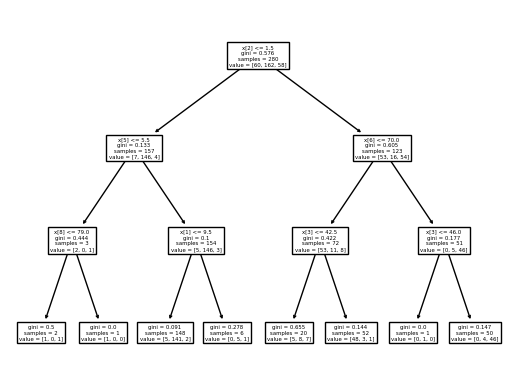

In [26]:
tree.plot_tree(clf_tree) 

# Random forests

In [27]:
clf = RandomForestClassifier(
    max_depth=4, 
    random_state=0, 
    n_estimators=200)

In [28]:
clf.fit(X_train, y_train) 

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [29]:
clf.score(X_train, y_train), clf.score(X_test, y_test) 

(0.9392857142857143, 0.8936170212765957)

In [30]:
for name, score in zip(X_col, clf.feature_importances_):
    print(name, score)

Gender 0.01001057009238003
Age 0.201262612306092
Occupation 0.23115544115104206
Sleep Duration 0.14014088154685111
Quality of Sleep 0.11520474931351521
Physical Activity Level 0.030711962941450354
Stress Level 0.10121429483560541
BMI Category 0.04036384154675777
Heart Rate 0.05363274376994924
Daily Steps 0.07630290249635696


# Gradient Boosting

In [31]:
gb_clf = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.2) 

In [32]:
gb_clf.fit(X_train, y_train) 

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=300)

In [33]:
gb_clf.score(X_train, y_train), gb_clf.score(X_test, y_test) 

(0.8650666283531129, 0.3723521268121983)

In [34]:
for name, score in zip(X_col, gb_clf.feature_importances_):
    print(name, score)

Gender 0.013586871907159803
Age 0.038461105360445155
Occupation 0.17464255120481167
Sleep Duration 0.24200759819004308
Quality of Sleep 0.029966342038123147
Physical Activity Level 0.00859394474195731
Stress Level 0.32660014414825184
BMI Category 0.00043411880347915283
Heart Rate 0.022820332525461437
Daily Steps 0.14288699108026745


In [35]:
gb_clf.get_params() 

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [36]:
gb_clf.estimators_ 

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x30DBD60)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x30DBD60)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x30DBD60)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x30DBD60)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x30DBD60)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_state=RandomState(MT19937) at 0x30DBD60)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                              random_